<a href="https://colab.research.google.com/github/Raghnus/coding-dojo/blob/main/Track2/ComparacionClasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Comparación métodos cluster**
###Autor: Juan Játiva
###Fecha de creación: 2022/02/25
###Fecha última actualización: 2022/02/25

##**Descripción**
Realizara una comparación de la precisión entre los metodos KMeans, Cluster jerárquico y DBSCAN.

##Montaje de datos e importación del librerias.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from IPython.core.pylabtools import figsize
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

##Exploración y limpieza de datos.

In [3]:
df = pd.read_csv('/content/drive/MyDrive/PTCienciaDatos/MachineLearning/cust_seg.csv')
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


In [5]:
print('Porcentaje de valores faltantes',round((df['Defaulted'].isna().sum()*100)/len(df),2),'%')

Porcentaje de valores faltantes 17.65 %


In [6]:
df = df.dropna(how='any')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       700 non-null    int64  
 1   Customer Id      700 non-null    int64  
 2   Age              700 non-null    int64  
 3   Edu              700 non-null    int64  
 4   Years Employed   700 non-null    int64  
 5   Income           700 non-null    int64  
 6   Card Debt        700 non-null    float64
 7   Other Debt       700 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  700 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 60.2 KB


In [7]:
df['Debt'] = df['Card Debt']+df['Other Debt']

##Constitución de los modelos.

###KMeans

In [49]:
df_kmean = df[['Age','Years Employed','Income','Debt', 'Defaulted','DebtIncomeRatio']]
df_kmean.head()

,Age,Years Employed,Income,Debt,Defaulted,DebtIncomeRatio
0,41,6,19,1.197,0.0,6.3
1,47,26,100,12.800,0.0,12.8
2,33,10,57,11.913,1.0,20.9
3,29,4,19,1.197,0.0,6.3
4,47,31,253,18.216,0.0,7.2


In [50]:
siluetas = []
for x in range (2,12):
  kmeans = KMeans(n_clusters=x, init='random', random_state=2)
  kmeans.fit(df_kmean)
  siluetas.append(silhouette_score(df_kmean, kmeans.labels_))

Text(0, 0.5, 'Score silueta')

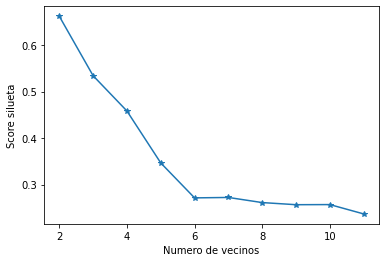

In [51]:
plt.plot(range(2,12),siluetas, marker='*')
plt.xlabel('Numero de vecinos')
plt.ylabel('Score silueta')

In [52]:
kmeans = KMeans(n_clusters=2,init='random', random_state=2)
kmeans.fit(df_kmean)
round((silhouette_score(df_kmean, kmeans.labels_)*100),2)

66.2

In [53]:
df_kmean['Cluster'] = kmeans.predict(df_kmean)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [54]:
df_kmean.head(6)

,Age,Years Employed,Income,Debt,Defaulted,DebtIncomeRatio,Cluster
0,41,6,19,1.197,0.0,6.3,0
1,47,26,100,12.800,0.0,12.8,1
2,33,10,57,11.913,1.0,20.9,0
3,29,4,19,1.197,0.0,6.3,0
4,47,31,253,18.216,0.0,7.2,1
6,38,4,56,0.896,0.0,1.6,0


###Jerárquico

In [56]:
df_jerarquico = df[['Age','Years Employed','Income','Debt', 'Defaulted','DebtIncomeRatio']]
df_jerarquico.head(6)

,Age,Years Employed,Income,Debt,Defaulted,DebtIncomeRatio
0,41,6,19,1.197,0.0,6.3
1,47,26,100,12.800,0.0,12.8
2,33,10,57,11.913,1.0,20.9
3,29,4,19,1.197,0.0,6.3
4,47,31,253,18.216,0.0,7.2
6,38,4,56,0.896,0.0,1.6


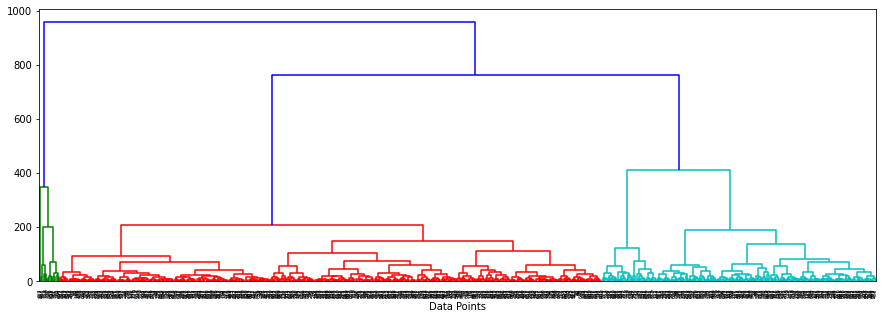

In [57]:
plt.figure(figsize=(15,5))
sch.dendrogram(sch.linkage(df_jerarquico, method='ward'))
plt.xlabel('Data Points');

In [58]:
siluetas = []
for x in range (2,12):
  jerarquia = AgglomerativeClustering(n_clusters=x)
  jerarquia.fit(df_jerarquico)
  siluetas.append(silhouette_score(df_jerarquico, jerarquia.labels_))

Text(0, 0.5, 'Score silueta')

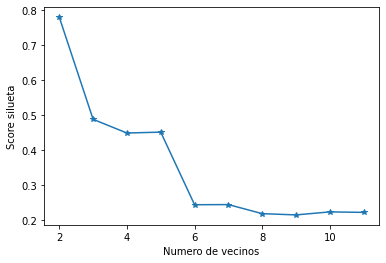

In [59]:
plt.plot(range(2,12),siluetas, marker='*')
plt.xlabel('Numero de vecinos')
plt.ylabel('Score silueta')

In [60]:
jerarquia = AgglomerativeClustering(n_clusters=2)
jerarquia.fit(df_jerarquico)
round((silhouette_score(df_jerarquico, jerarquia.labels_)*100),2)

78.06

In [61]:
df_jerarquico['Cluster'] = jerarquia.fit_predict(df_jerarquico)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
df_jerarquico.head(6)

,Age,Years Employed,Income,Debt,Defaulted,DebtIncomeRatio,Cluster
0,41,6,19,1.197,0.0,6.3,0
1,47,26,100,12.800,0.0,12.8,0
2,33,10,57,11.913,1.0,20.9,0
3,29,4,19,1.197,0.0,6.3,0
4,47,31,253,18.216,0.0,7.2,1
6,38,4,56,0.896,0.0,1.6,0


###DBSCAN

In [63]:
df_dbscan = df[['Age','Years Employed','Income','Debt', 'Defaulted','DebtIncomeRatio']]
df_dbscan.head()

,Age,Years Employed,Income,Debt,Defaulted,DebtIncomeRatio
0,41,6,19,1.197,0.0,6.3
1,47,26,100,12.800,0.0,12.8
2,33,10,57,11.913,1.0,20.9
3,29,4,19,1.197,0.0,6.3
4,47,31,253,18.216,0.0,7.2


In [122]:
siluetas= []
for y in range(18,24,1):
    dbs = DBSCAN(eps=y,min_samples=3)
    dbs.fit(df_dbscan)
    siluetas.append(silhouette_score(df_dbscan, dbs.labels_))

Text(0, 0.5, 'Score silueta')

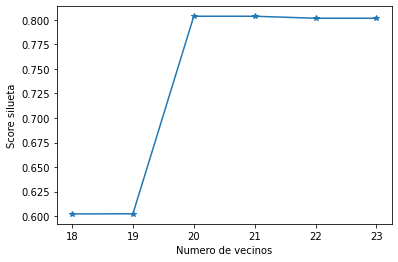

In [123]:
plt.plot(range(18,24,1),siluetas, marker='*')
plt.xlabel('Numero de vecinos')
plt.ylabel('Score silueta')

In [126]:
dbs = DBSCAN(eps=20,min_samples=3).fit(df_dbscan)
round((silhouette_score(df_dbscan,dbs.labels_)*100),2)

80.37

In [128]:
df_dbscan['Cluster']=dbs.fit_predict(df_dbscan)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [130]:
df_dbscan.head()

,Age,Years Employed,Income,Debt,Defaulted,DebtIncomeRatio,Cluster
0,41,6,19,1.197,0.0,6.3,0
1,47,26,100,12.800,0.0,12.8,0
2,33,10,57,11.913,1.0,20.9,0
3,29,4,19,1.197,0.0,6.3,0
4,47,31,253,18.216,0.0,7.2,1


##Conclusión.-
En términos generales y en base a la cantidad de información recibida, podemos decir que primera aproximación para la clasificación y no tan precisa, sería el método de clasificación jerárquica, a su vez si la busqueda es de precisión optaría más por el metodo DBSCAN, consideran que la dispersión de los datos es muy alta.